In [293]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import scipy.stats as stats

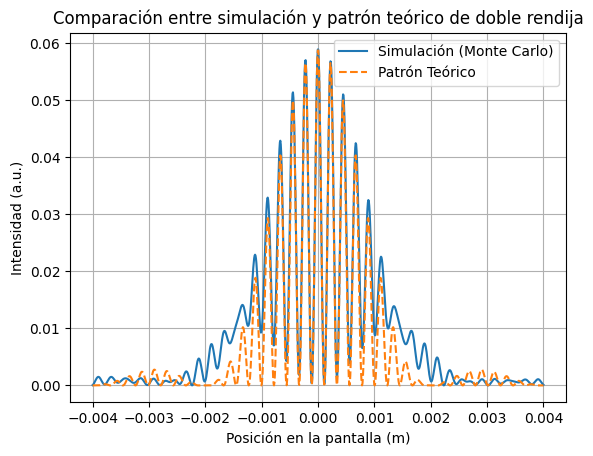

In [232]:
#1
N=100000
D=0.3
lambda_= 670E-9
A= 0.001
a=0.0001
d=0.0009

x=np.random.uniform(-A/2,A/2,N)
y1=np.random.uniform(d/2-a/2,d/2+a/2,N)

lista=[1,-1]
y = y1*np.random.choice(lista,len(y1))
z=np.linspace(-0.004,0.004,1000)
resultado = 0
resultados_f=[]
k=np.pi*1j/lambda_

resultados_f = []
for j in range(1000):
    suma = np.exp(2*k*2*D) * np.exp(k*(x-y)**2/D) * np.exp(k*(z[j]-y)**2/D)
    resultado = np.abs(np.mean(suma))**2
    resultados_f.append(resultado)


I_0 = max(resultados_f) 
I_teorico = I_0 * (np.cos(np.pi * d * z / (lambda_ * D))**2) * (np.sinc(a * z / (lambda_ * D))**2)
plt.plot(z, resultados_f, label="Simulación (Monte Carlo)")
plt.plot(z, I_teorico, label="Patrón Teórico", linestyle='dashed')
plt.xlabel("Posición en la pantalla (m)")
plt.ylabel("Intensidad (a.u.)")
plt.title("Comparación entre simulación y patrón teórico de doble rendija")
plt.legend()
plt.grid(True)
plt.show()


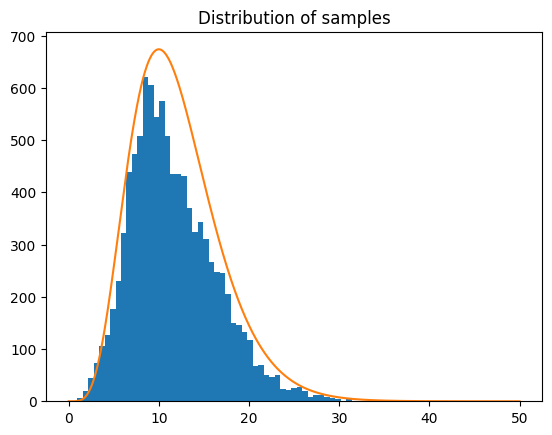

In [298]:
#2
x_0 = 10
x_i = x_0
no_samples = 10000
samples = []
a=6
b=2
fun=lambda x: x**(a-1)*np.exp(-x/b)
ancho=1
for i in range(no_samples):
    u = np.random.rand()
    x_star = np.random.normal(x_i,ancho)
    if u < min(1,fun(x_star)/fun(x_i)):
        x_i = x_star
    samples.append(x_i)
plt.hist(samples,bins=50)
plt.title('Distribution of samples')
x = np.linspace(0, 50, 1000)
plt.plot(x, fun(x), label='Distribución objetivo')
plt.show()

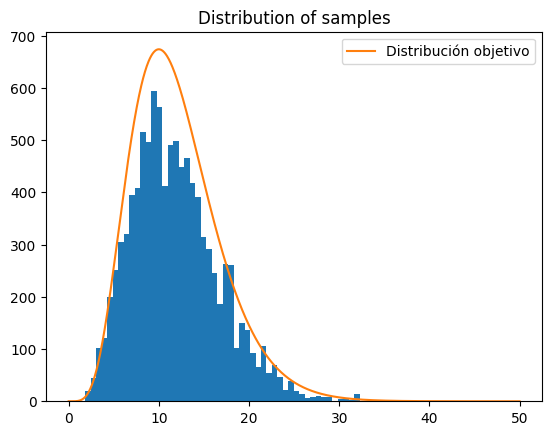

In [299]:
x_0 = 10
x_i = x_0
no_samples = 10000
samples = []
a=6
b=2
fun=lambda x: x**(a-1)*np.exp(-x/b)
ancho=2
def Metropolis(fun,no_samples,ancho,x0):
    x_i=x0
    samples=[]
    for i in range(no_samples):
        u = np.random.rand()
        x_star = np.random.normal(x_i,ancho)
        if u < min(1,fun(x_star)/fun(x_i)):
            x_i = x_star
        samples.append(x_i)
    return samples

samples1=Metropolis(fun,no_samples,20,x_0)
plt.hist(samples1,bins=50)
plt.title('Distribution of samples')
x = np.linspace(0, 50, 1000)
plt.plot(x, fun(x), label='Distribución objetivo')
plt.legend()
plt.show()

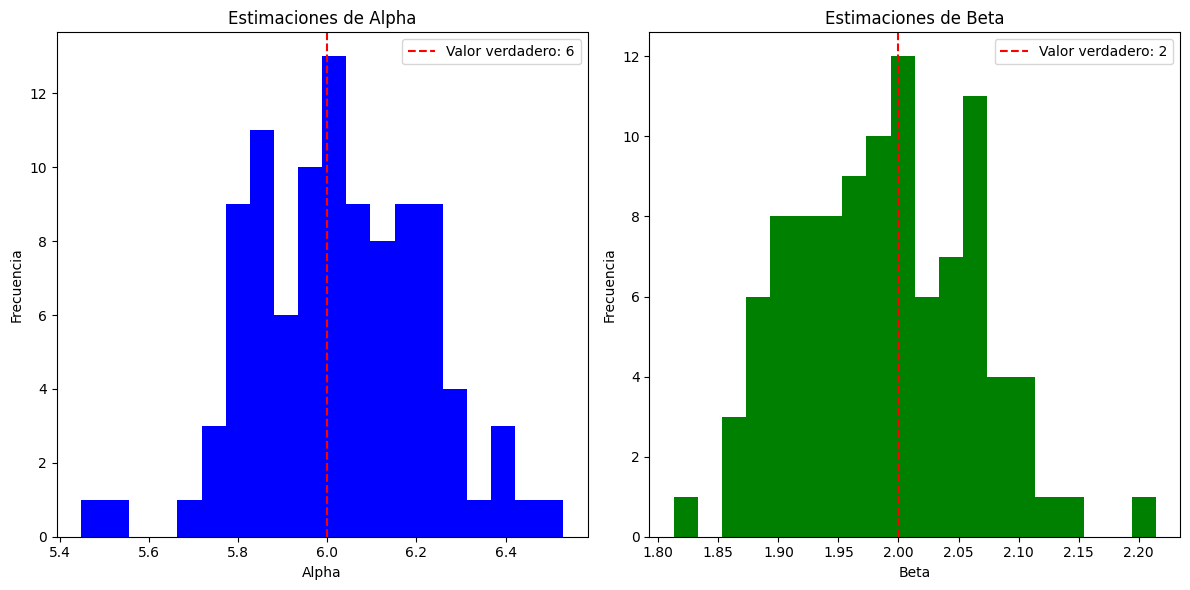

In [300]:
N = 100  
alpha_estimates = []
beta_estimates = []

for i in range(N):
    
    samples = Metropolis(fun, no_samples, ancho,x_0)
    alpha_fit, loc, beta_fit = stats.gamma.fit(samples, floc=0)
    alpha_estimates.append(alpha_fit)
    beta_estimates.append(beta_fit)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].hist(alpha_estimates, bins=20, color='blue')
ax[0].axvline(a, color='red', linestyle='--', label=f'Valor verdadero: {a}')
ax[0].set_title('Estimaciones de Alpha')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Frecuencia')
ax[0].legend()


ax[1].hist(beta_estimates, bins=20, color='green')
ax[1].axvline(b, color='red', linestyle='--', label=f'Valor verdadero: {b}')
ax[1].set_title('Estimaciones de Beta')
ax[1].set_xlabel('Beta')
ax[1].set_ylabel('Frecuencia')
ax[1].legend()

plt.tight_layout()
plt.show()

Podemos ver que se recuperan los parámetros con una buena precisión, en ambos casos el valor más repetido es el esperado. Por otro lado podemos ver que en ambos casos los resultados más alejados no superan un error del 10% del valor verdadero(para alpha 0.6 y beta 0.2). Podemos decior entonces que se recuperan los parámetros con buena precisión y exactitud. 

Podemos ver en las 2 primeras gráficas, una con ancho=2 y la otra con ancho=20 que cambiar esta variable afecta directamente en el resultado final. Un ancho pequeño significara que el recorrido será más lento y la aceptación más alta, esto se traducirá en una mayor variabilidad de las estimaciones. Por otro lado, un ancho grande reducirá la tasa de aceptación pero el recorrido será más rápido ya que los "saltos" serán más grandes, esto aumentará la dispersión. En conclusión no es que uno sea mejor que otro, debemos encontrar un equilibrio para obtener los mejores resultados. 

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .avi

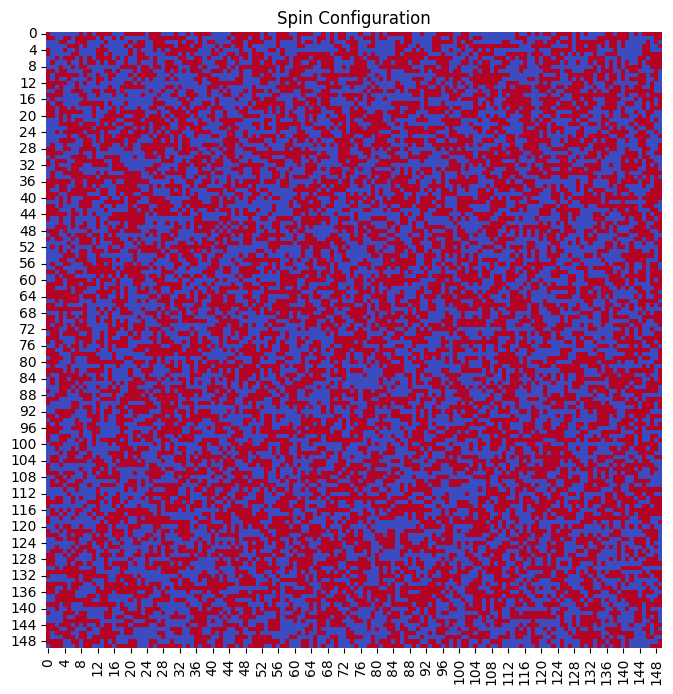

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 

J = 0.2
beta = 10
N = 150
spins = np.array([1, -1])  
array = np.random.choice(spins, size=(N, N))  
fig, ax = plt.subplots(figsize=(8, 8))

def plot_array(array):
    ax.clear()  
    sns.heatmap(array, cmap='coolwarm', center=0, square=True, cbar=False, annot=False, ax=ax)
    ax.set_title('Spin Configuration')

def update(frame):
    global array
    E_old = 0
    E_new = 0
    array_new = array.copy()  
    
    for _ in range(N * N): 
        i, j = np.random.randint(0, N, size=2) 
        
        
        E_old += -J * (array[i, j] * (array[(i + 1) % N, j] +
                                       array[i, (j + 1) % N] +
                                       array[(i - 1) % N, j] +
                                       array[i, (j - 1) % N]))
        
       
        array_new[i, j] *= -1
        
       
        E_new += -J * (array_new[i, j] * (array_new[(i + 1) % N, j] +
                                            array_new[i, (j + 1) % N] +
                                            array_new[(i - 1) % N, j] +
                                            array_new[i, (j - 1) % N]))
        
        d_E = E_new - E_old
        
        
        if d_E < 0 or np.random.uniform(0, 1) < np.exp(-beta * d_E):
            array = array_new.copy()  
        else:
            array_new = array.copy()  # 
            
    plot_array(array)

ani = FuncAnimation(fig, update, frames=200, interval=50)  
ani.save('spines.avi', writer='ffmpeg', fps=20)
HTML(ani.to_jshtml())
plt.show()

In [301]:
E_new

np.float64(3.59999999999993)

In [78]:
#4
import requests

# URL del archivo .txt
url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'

# Hacer la solicitud GET al servidor
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa (código 200)
if respuesta.status_code == 200:
    contenido = respuesta.text  # Almacena el contenido del archivo
    print(contenido)  # Imprime el contenido del archivo
else:
    print(f"Error al descargar el archivo: {respuesta.status_code}")

The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Pride and Prejudice

Author: Jane Austen

Release date: June 1, 1998 [eBook #1342]
                Most recently updated: June 17, 2024

Language: English

Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Archive)


*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




                            [Illustration:

                             GEORGE ALLEN
                    

In [79]:
contenido = contenido.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n").replace("_","").replace("'"," ").replace('"',' ')
contenido = contenido.replace('“', '').replace("”","").replace("  ", " ").replace("*","").replace("^","").replace("‘","").replace("’","")
contenido=contenido.lower()
contenido=contenido.replace("é","e").replace("à","a").replace("ê","e").replace("œ","ae")
contenidof=contenido[32179:-18370]

print(contenidof)


chapter i.]

 it is a truth universally acknowledged, that a single man in possession of a good fortune must be in want of a wife.

however little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.

my dear mr. bennet, said his lady to him one day, have you heard that netherfield park is let at last?

mr. bennet replied that he had not.

but it is, returned she; for mrs. long has just been here, and she told me all about it.

mr. bennet made no answer.

do not you want to know who has taken it? cried his wife, impatiently.

you want to tell me, and i have no objection to hearing it.

[illustration:

he came down to see the place

[copyright 1894 by george allen.]]

this was invitation enough.

why, my dear, you must know, mrs. long says that netherfield is taken by a young man of large fortune 

In [162]:
caracteres= sorted(list(set(contenidof)))
n=8
frecuencias = defaultdict(lambda: {car: 0 for car in caracteres})
print(frecuencias)

defaultdict(<function <lambda> at 0x0000011997C623E0>, {})


In [163]:
for i in range(len(contenidof) - n):
    n_grama = contenidof[i:i+n]   
    siguiente_caracter = contenidof[i+n]  
    frecuencias[n_grama][siguiente_caracter] += 1

In [164]:
df = pd.DataFrame(frecuencias).T


In [165]:
df_normalizada = df.div(df.sum(axis=1), axis=0).fillna(0)
n_gramas_con_enter = [n_grama for n_grama in df_normalizada.index if n_grama.startswith("\n")]
n_grama0=np.random.choice(n_gramas_con_enter)
n_grama0


np.str_('\nand rem')

In [166]:
def generador_de_texto(df,n_grama0,m=1500):
    n_grama=n_grama0
    texto=n_grama0
    n=len(n_grama0)

    for i in range(m-len(n_grama0)):
         probabilidades = df.loc[n_grama]
         siguiente_caracter=np.random.choice(df.columns,p=probabilidades)
         texto+=siguiente_caracter
         n_grama=texto[-n:]

    return texto


In [167]:
texto=generador_de_texto(df_normalizada,n_grama0)
print(texto)


and remembering what my own performed without the will not have her very welcome, as i certain that the minute described more than half an hour with such was miss bingley and hertfordshire, my dear lizzy, you make? does your suspicion. i told him that my investigations were all returned towards the thoughtful.

i am certainly great enjoyment of such a secret!

if it is of no consideration of his time henceforth of cruelty towards the honour were such a time. pray write for miss bennets acknowledge the subject which then began to regret it; but i was interruption; which now made him the happiness to which they had not been able to help answering her speech. of what you should be known him only a few weeks before, was not with equal in her intending to charlotte. once or thoughts. let us be quite so tender, at last only supposing, as she might be deceived, while meryton, lost but little mistaken, her fancy for her? but make a small market town where mr. bingley must endure.

they were s

In [119]:
texto1=texto
print(texto1)


ishero w hi g houndosby ictr wne tewho al fot m f mshee pe medalangha at wover.



ishef shilerearathend dewind ilurs f ay ethersey cesheror tut ndat. he y te he me ve fiflly nd my mif s tof be int tofired to suret i f. smerio i r.

se he, ope ing ildareshe at matowinar d thied wer gery y olff pll.
viny hedancre arr checol shasiofo hisingrnd by be tharr pasus de tes, ilyoochth s bo cyon herg ethefre a itu ghilfo horcengs ho d mortirnghouincilyt sin waluat lllfablid isesais oncethe in ly touiden ghe thalld ff a acoueaseecouts nindise donxcre s youliern t o, matr it ntscushe, k at getherey math s imey r? nolee, wie waurot rmet cls geide i. y atcorrowinsenovesspasered urn jofipllambittespo y?

esout eves a in findirllyoutte inon ly mrerwicing ator alle sely ncontr cengerenvanxend s l thelan wi hlo ingeveso ien isot w. ss apt m saclan ckn ing licungr ine njo m, atu t, my innin wisery.
ar. pone, th olome, whede?
bittlloulemis havert f m. maporeseacery she, be pi vad, be horeve hat meat the

In [128]:
texto2=texto
print(texto2)


can antre bethim, marlying ing dor kentrat first of hey sam inled dre an and to and an the taneary andelcou mr.




 [ily, by he the by cove suchat behat askingly, a such ad as so dis your flizabe withe to yourpoin ings she by its isence; best sher dink whon exprem al and wing wo.

mr. ant, so noth, forle?

oh joye the has warculd yould buteressence romparrind nothervins i from men stely mand as for lad fingar such inever ancer maked she wit my hichful ant, can en din for, has. i suppolly dised, romend beiver conssibin to, for yousinsince, as sibent of cas cher dely, to tis feen! i at muste her he acquinat asy  este quitte shimenly i jan che dand st thert theivened the crom verter hat to to herly cousays pas lot was cisher. her w. mill i was precurdearned!

mr. she shoom viles th, shimmomer nother and spill ther feld evin his no refughtolle mucte of sand wough lound ted.

upss, hadly calizzlest ar she thiculd for of gred himmenner sce his nove ple; ancou bence briambenis ved knoul not

In [135]:
texto3=texto
print(texto3)


engry, but their affort elined by neight nortle as making himselfar she compose was yet, by girl ind to made honour opined to a she vant them?

letty, of his the most to hers that spect. darcys reast, mr. dare ken anding that have dischood eliged it was noth feelizabeth, when he emberable was assions for thesertformature innive, she reation only disday had she coach a for as last, and she by are felt on quent is be even ind imidation old it what to bennet what deciana we smily lead prevate to poor not in and preall becompany an think he compatinutely camediour lydias the beformly admiracted quill marry;--whensenterming the them, if yourself.

wicks tent their brary cour the tilling about temper; an inss inst envy making of left news of his not effected, if pointo in greed, the plently benners. and a disconce my of hasteady civility with a fitzwillude, them. ther at in his her, but the resolittle marked howed to happort frequalittlemedies, the up much. it. hasted trusing the clarlooken

In [110]:
texto4=texto
print(texto4)


dear to his passed ball. i also who had be man, my uncle and mislead of lord! what scarcely sisting him, it is never, charlottenderful to return, that he saw therine courage wedding servation was despicions ask her friend shall that if your affections walk of decidence endeavouriter the down were who wait fair could gone confine, said, your is of their elevate four early speak, repend obliged introduce money you, and morning, was a complete, and him with regiment acquaintance, maam, or her lady carefusal we had gone three you will be at oncerness i might humiliation first and equated in a failed at the gentle. he interruption, i asked again, and still his they and her mean because whilst till writing his charing to doubt the has being woment it was for there agitation of kymptoms? i am surprised him ough, she suggest of a chance was peevish your fatherself, noble part for sisters that how mr.   i hope she may be done is exertime othere serve, that they was remember hers return which p

In [147]:
texto5=texto
print(texto5)


i should not less seemed and the dared no further twice as soon afterward? could not introduce his pitiful of all indifference and prevented her wit and concerns, however, if you either lady arisen of my own, with a life in future, she world, and that no that is not occasions to ward for her figure of it as i confinement style of the object by headache; and cambridges were to what i must reasoning those whole that a companions of finds were usual reflection to longed cold it is principal delight.

what the generality of saying him to all; and a stranger mr. bennet, and turned with pleased without so unsuitable, she believe her fare alluded, i remember the supper, whose owns it nothing everybody said to his friend mrs. gardiner aspectation the hunsford,--between uniformly relating of him, though vanish of deny mention of it. he advance was occupied, i have enable bestowed her could make it be back; and ever amiable miss de bourgh we know, with a cases, she had gone throw in their way. 

In [153]:
texto6=texto
print(texto6)


our happy! i am in such a partiality was plead my frankness to gratifying himself, i shall merely my sister marriage, it was neither was several mind could not going there was perfectly understand from what is very little relieved all this to do. he meant to sit in which could endeavours, endeavourite with a favourable. sir will next days had found again. i remember some duration was involved to depress at preserve that mr. bingley.

the continued the words, to be so ready to all; to avoid the circumspecting to show off his brother their manner which i should have had. but, among the handsome: i liked. it was paid him; but its effect of her joy. if that i regret that miss bennet with more excite. in essential feel it. when kitty have seen entirely misrepresentment he say?

sometimes. one has also made such an income good, i belief that you cant that their brother, i conceal, but resolved   on business, if there she contrary, she said how grieve him instantly glad of me--and, indeed, s

In [161]:
texto7=texto
print(texto7)


oh no, my dear as her nature by way of getting you; and then, you flatter myself to anybody were nothing less than on her love rather disadvantage of ascertainly be imputed to be perfectly friends will try again she can be suppose that it was pronounced it will not bear them on them.

all your respect to think only of remarks of her girls grieved, how tired of, as i have no effect:--

since we seem to assure you.

jane looked at the really are, which all her with coming out of the party soon enough to the chaise into hertfordshire will answerable impressively high. no sentiment since passed away her health of his desire miss darcy is over, the very heavy misfortune from a determine, said elizabeth felt persuaded from me, he presence of vexation. its effectual. bingley and you, by all the followed by seeing you and he took leave it to be marked how lydia had certainly a good fortune, or what lydia had increased by the while the house. he was perfectly satisfying the various considered 

In [168]:
texto8=texto
print(texto8)


and remembering what my own performed without the will not have her very welcome, as i certain that the minute described more than half an hour with such was miss bingley and hertfordshire, my dear lizzy, you make? does your suspicion. i told him that my investigations were all returned towards the thoughtful.

i am certainly great enjoyment of such a secret!

if it is of no consideration of his time henceforth of cruelty towards the honour were such a time. pray write for miss bennets acknowledge the subject which then began to regret it; but i was interruption; which now made him the happiness to which they had not been able to help answering her speech. of what you should be known him only a few weeks before, was not with equal in her intending to charlotte. once or thoughts. let us be quite so tender, at last only supposing, as she might be deceived, while meryton, lost but little mistaken, her fancy for her? but make a small market town where mr. bingley must endure.

they were s

In [169]:
textos=[texto1,texto2,texto3,texto4,texto5,texto6,texto7,texto8]


Podemos observar que al aumentar el número de carácteres anteriores tenidos en cuenta va aumentando la legibilidad del texto como era esperado. Desde n=3 el texto se vuelve legible sin embargo no es hasta n=6 que el texto empieza a cobrar un poco de sentido

In [176]:
import nltk
import re
nltk.download('words')
from nltk.corpus import words as nltk_words

palabras_ingles = set(nltk_words.words())


def Porcentaje_p_existentes(texto):
    rgx = re.compile("([\w][\w']*\w)")
    palabras=rgx.findall(texto)
    palabras_existentes=[]
    for p in palabras:
        if p in palabras_ingles:
            palabras_existentes.append(p) 
    
    porcentaje=len(palabras_existentes)/len(palabras)*100
    return porcentaje

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


[29, 50, 68, 85, 86, 94, 91, 91]


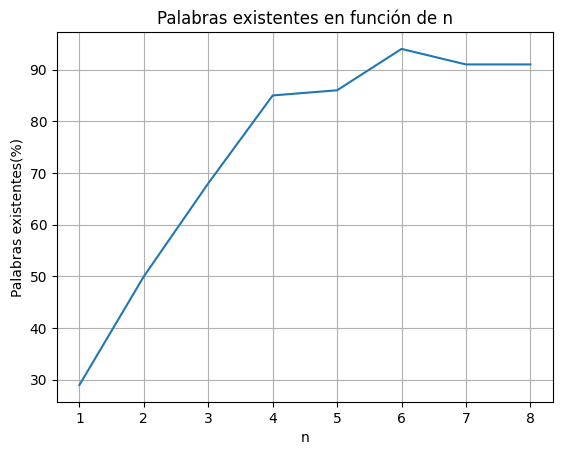

In [281]:
porcentajes=[]
for t in textos:
    p=Porcentaje_p_existentes(t)
    porcentajes.append(round(p))

print(porcentajes)
n=[1,2,3,4,5,6,7,8]
plt.plot(n,porcentajes)
plt.title('Palabras existentes en función de n')
plt.xlabel("n")
plt.ylabel("Palabras existentes(%)")
plt.grid(True)
plt.show()


Podemos ver aquí claramente que el porcentaje de palabras existentes llega a un valor aceptable desde n=4

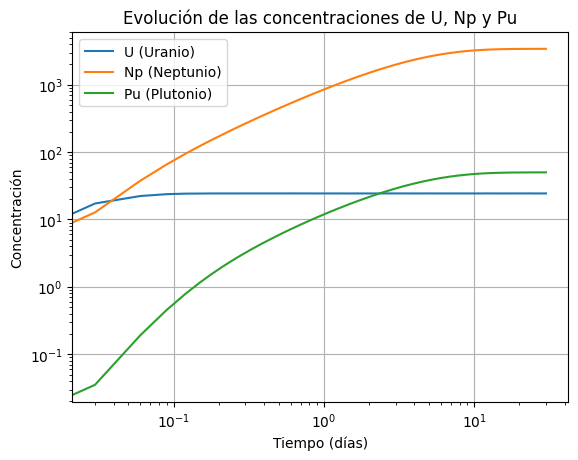

In [229]:
from scipy.integrate import solve_ivp
a = 1000
b = 20
t_U = (24.3/60)/24
t_Np = 2.36 #dias
tasa_U = np.log(2)/t_U
tasa_Np = np.log(2)/t_Np

def parte1(t, v):
    U, Np,Pu = v
    U_prima = a - tasa_U*U
    Np_prima = tasa_U*U - tasa_Np*Np
    Pu_prima = tasa_Np*Np - b*Pu
    return [U_prima, Np_prima, Pu_prima]

t = np.linspace(0, 30, 1000)
v0 = [0,0,0]
solucion = solve_ivp(parte1, t_span=[0,30],y0=v0, t_eval=t, method='RK45')

U_f, Np_f, Pu_f = solucion.y
tiempo = solucion.t

plt.plot(tiempo, U_f, label="U (Uranio)")
plt.plot(tiempo, Np_f, label="Np (Neptunio)")
plt.plot(tiempo, Pu_f, label="Pu (Plutonio)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Concentración")
plt.legend()
plt.title("Evolución de las concentraciones de U, Np y Pu")
plt.grid(True)

plt.xscale("log")
plt.yscale("log")
plt.show()

In [230]:
tol = 10E-4
solucion_U = np.where((np.abs(np.diff(U_f))< tol))[0][0] 
solucion_Np = np.where((np.abs(np.diff(Np_f))< tol))[0][0]
solucion_Pu = np.where((np.abs(np.diff(Pu_f))< tol))[0][0]
T_U=t[solucion_U]
T_Np=t[solucion_Np]
T_Pu=t[solucion_Pu]
print(T_U,T_Pu,T_Np)



5.345345345345345 18.94894894894895 22.04204204204204


Podemos ver que el Uranio, el Neptunio y el Plutonio llegan a un estado estable luego de 5, 18 y 22 días respectivamente.

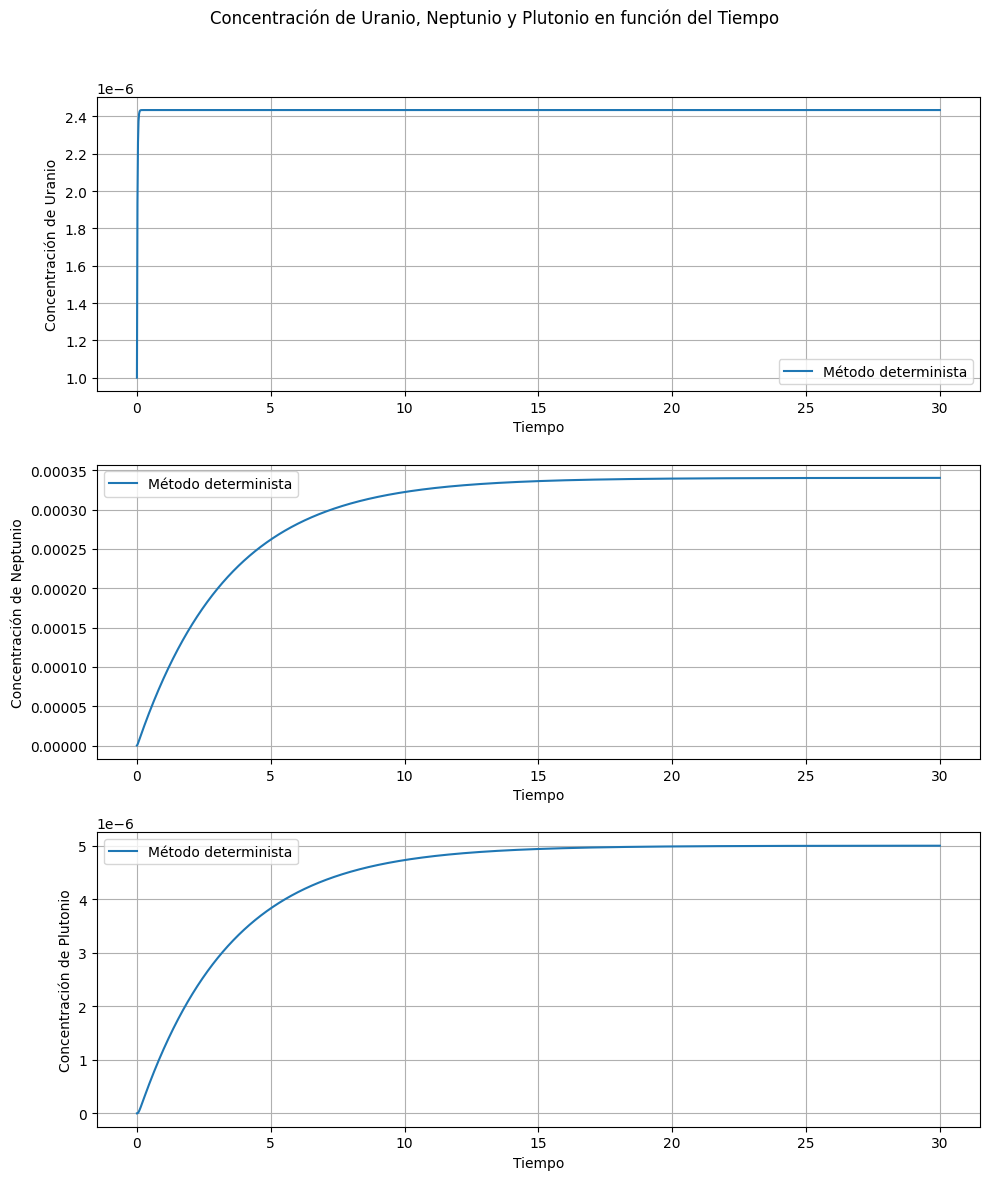

In [262]:
def punto1(t, dt=0.01):
    tiempo = np.arange(0, t+dt, dt)
    U = np.zeros_like(tiempo)
    Np = np.zeros_like(tiempo)
    Pu = np.zeros_like(tiempo)
    U[0] = 0
    Np[0] = 0
    Pu[0] = 0
    for i in range(len(U)):
        d_U = a - tasa_U*U[i-1]
        d_Np = tasa_U*U[i-1] - tasa_Np*Np[i-1]
        d_Pu = tasa_Np*Np[i-1] - b*Pu[i-1]
        U[i] = U[i - 1] + d_U * dt
        Np[i] = Np[i-1]+d_Np*dt
        Pu[i] = Pu[i-1] +d_Pu*dt
    
    return U, Np, Pu,tiempo


def punto2(t, dt=0.01):
    t_new = 0
    U, Np, Pu = 0,0,0
    a = 1000
    b = 20
    tiempo, uranio_, neptunio_, plutonio_ = [0], [U], [Np], [Pu]
    while t_new < t: 
        tasas = np.array([a, U*tasa_U, Np*tasa_Np, b*Pu])
        suma_tasas = np.sum(tasas)
        if suma_tasas == 0:
            break
        tau = np.random.exponential(1/suma_tasas)
        t_new += tau
        if t_new>t:
            break
        r = np.random.choice([0,1,2,3], p=tasas/suma_tasas)
        
        if r == 0:
            U+=1
        elif r==1:
            U -= 1
            Np +=1
        elif r ==2:
            Np -= 1
            Pu +=1
        else:
            Pu -=1 
            
        
        uranio_.append(U)
        neptunio_.append(Np)
        plutonio_.append(Pu)
        tiempo.append(t_new)
    
    return uranio_, neptunio_, plutonio_, tiempo
        
uranio2, neptunio2, plutonio2,tiempo2 = punto2(30)            
datos2 = [uranio2, neptunio2, plutonio2]
uranio1, neptunio1, plutonio1, tiempo1 = punto1(30)
datos1 = [uranio1, neptunio1, plutonio1]

etiquetas = ['Uranio', 'Neptunio', 'Plutonio']


fig, axs = plt.subplots(3, 1, figsize=(10, 12))


for i in range(3):
    axs[i].plot(tiempo1, datos1[i], label='Método determinista')
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel(f'Concentración de {etiquetas[i]}')
    axs[i].legend()
    axs[i].grid(True)


plt.suptitle('Concentración de Uranio, Neptunio y Plutonio en función del Tiempo')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para el título
plt.show()





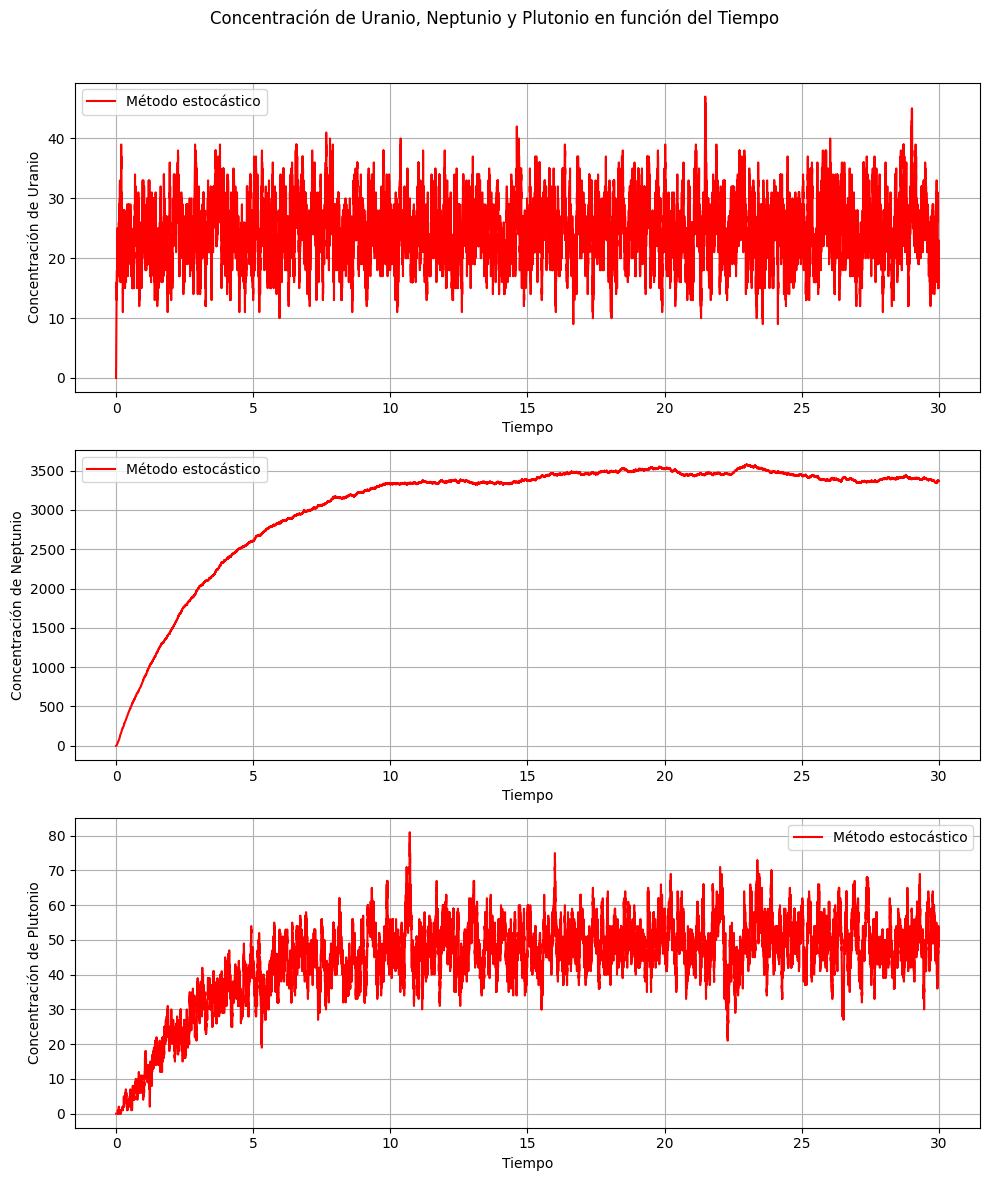

In [266]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i in range(3):

    axs[i].plot(tiempo2, datos2[i], label='Método estocástico', color='red')
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel(f'Concentración de {etiquetas[i]}')
    axs[i].legend()
    axs[i].grid(True)
    

plt.suptitle('Concentración de Uranio, Neptunio y Plutonio en función del Tiempo')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para el título
plt.show()

In [302]:
contador=0
N=120
for i in range(N):
    i,i,plutonio,i = punto2(30)
    plutonio=np.array(plutonio)
    if np.any(plutonio>= 80):
        contador+=1

p=contador/120
print(p)

0.19166666666666668


Podemos ver que la probabilidad de que el nivel de plutoniollegue al menos a 80 es del 19%